## メルフィルタバンク

フーリエ変換したあと、特徴量として使えるのはフーリエ変換で使った要素数の半分までだがそれでもかなりの数がある。N=1024の場合でも512。

そのため、違いがそんなにわからない範囲でビン分けして20次元くらいにおとす。
「違いがそんなにわからない範囲」というのは知覚の問題となり、高周波ほど違いがわかりにくいということから、ビンの間隔はメル尺度上で等間隔になるようにする。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import speelysis as sly

このフォルダから、speelysisという過去に作成したプログラムをまとめた自作ライブラリを用いる。その中にメル尺度への変換やその逆変換、短時間フーリエ変換の関数などが定義されている。

In [2]:
# メル尺度の確認

mel_scaled = sly.mel_scale(700)
imel_scaled = sly.imel_scale(700)
def mel_check(hz):
    mel = mel_scaled(hz)
    x = imel_scaled(mel)
    print(hz, "to mel ->", mel)
    print(mel, "to hz ->", x)

In [3]:
mel_check(8000)

8000 to mel -> 2840.0641221591754
2840.0641221591754 to hz -> 8000.000000000002


In [4]:
def plot_mel(f0):
    mel_scaled = sly.mel_scale(f0)
    xs = np.arange(8000)
    mel_xs = mel_scaled(xs)
    plt.plot(xs, mel_xs)

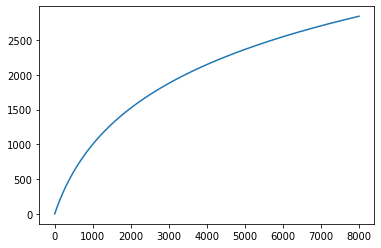

In [5]:
# 自由パラメータ=700Hzのときの横軸周波数、縦軸メル尺度のグラフ
plot_mel(700)

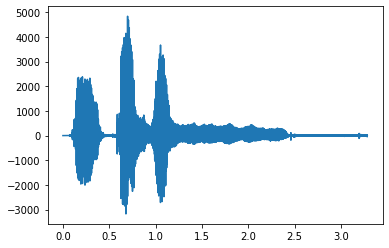

In [6]:
# 以下、実際の音声の短時間フーリエ変換後の1フレームにメルフィルタバンクを適用する
audio = sly.Audio(*wav.read("../resources/aiueo.wav")).high_pass_filtered()
audio.plot()

In [7]:
def stfted(n, a):
    window = np.hamming(n)
    return np.array([np.abs(f) for f in sly.stft(a, window, 10)]) ** 2.0

In [8]:
frame_lengths = list(sly.frame_candidates(audio.rate, 20, 80))
print("フーリエ変換の要素数候補", frame_lengths)
n = frame_lengths[-1]

data = stfted(n, audio)
freq = np.fft.rfftfreq(n, d=1/audio.rate)

フーリエ変換の要素数候補 [512, 1024]


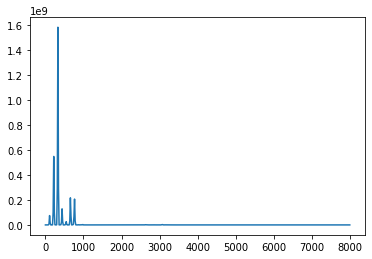

In [9]:
#真ん中のフレーム
ex = data[len(data)//2]
plt.plot(freq, ex)

In [10]:
# メルフィルタバンク
nyquist = audio.rate // 2
n_nyquist = len(ex)
n_bins = 20
bank = sly.mel_filter_bank(nyquist, n_nyquist, n_bins)
fs = np.linspace(0, nyquist, n_nyquist) 

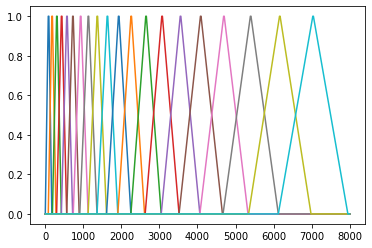

In [11]:
for f in bank:
    plt.plot(fs, f)

In [12]:
#ビン分け
bined = bank.dot(ex)

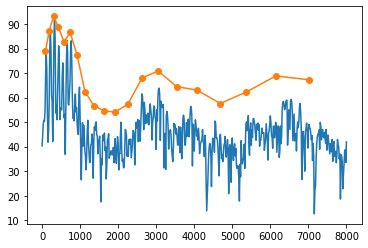

In [13]:
bin_xs = sly.mel_filter_bank_freq(nyquist, n_bins)

plt.plot(freq, 10 * np.log10(ex))
plt.plot(bin_xs, 10 * np.log10(bined), marker="o")